<img src="https://raw.githubusercontent.com/andre-marcos-perez/ebac-course-utils/main/media/logo/newebac_logo_black_half.png" alt="ebac-logo">

---

# **Módulo 10** | Python: Projeto Final

#### Caderno de **Aula**<br>
### Professor [André Perez](https://www.linkedin.com/in/andremarcosperez/)

## Aluno [João Pedro S. Cobos](https://github.com/joaocobos)

---

# **Projeto final #M10 [EBAC - DESENVOLVEDOR BACK-END PYTHON](https://ebaconline.com.br/back-end-python)** 😄🚀

### 0\. Análise de dados de crédito bancário entre clientes **ADIMPLENTES e INADIMPLENTES**.

# 1\. Uma breve descrição do problema:

Aqui nesse notebook iremos analisar dados de crédito presente neste [link](https://raw.githubusercontent.com/andre-marcos-perez/ebac-course-utils/develop/dataset/credito.csv). Esses dados estão no formato CSV e contém informações sobre clientes de uma instituição financeira. Em especial, estamos interessados em explicar a segunda coluna, chamada de **default**, que indica se um cliente é adimplente( default = 0 ), ou inadimplente ( default = 1 ). **Queremos entender o porque um cliente deixa de honrar com suas dívidas** baseado no comportamento de outros atributos, como salário, escolaridade e movimentação financeira. Uma descrição completa dos atributos está abaixo: ⤵️

O atributo de interesse ( default ) é conhecido como **váriavel resposta** ou **variável dependente**, já os demais atributos que buscam explicá-la (idade, salário, etc.) São conhecidas como **variáveis explicativas**, **variáveis independentes** ou até mesmo **variáveis preditoras**.



| Coluna  | Descrição |
| ------- | --------- |
| id      | Número da conta bancária |
| default | Indica se o cliente é adimplente (0) ou inadimplente (1) |
| idade   | 18 a 60 anos |
| sexo    | F ou M |
| depedentes | 0 a 5 |
| escolaridade | Sem educação formal, ensino médio, graduação, mestrado ou doutorado |
| estado_civil | Solteiro, casado ou divorciado |
| salario_anual | Faixa do salario mensal multiplicado por 12 |
| tipo_cartao | Categoria do cartao: blue, silver, gold e platinium |
| meses_de_relacionamento | Quantidade de meses desde a abertura da conta |
| qtd_produtos | Quantidade de produtos contratados |
| iteracoes_12m | Quantidade de iteracoes com o cliente no último ano |
| meses_inatico_12m | Quantidade de meses que o cliente ficou inativo no último ano |
| limite_credito | Valor do limite do cartão de crédito |
| valor_transacoes_12m | Soma total do valor das transações no cartão de crédito no último ano |
| qtd_transacoes_12m | Quantidade total de transações no cartão de crédito no último ano |



# 2\. Código de importação de bibliotecas:

PEP 8 - Imports: https://peps.python.org/pep-0008/#imports

In [1]:
# 1. Standard library imports:

# 2. Related third party imports:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 3. Local application/library specific imports:

# 3\. Download / Carregamento / Geração de Dados:

In [2]:
df = pd.read_csv('/content/credito.csv', na_values='na')

# 4\. Exploração dos Dados:

### 4.1 Estrutura:

In [3]:
df # Visualizando as 5 primeiras e últimas linhas do dataframe, qtde de linhas e qtde de colunas:

id  default  idade sexo  dependentes         escolaridade  \
0      768805383        0     45    M            3         ensino medio   
1      818770008        0     49    F            5             mestrado   
2      713982108        0     51    M            3             mestrado   
3      769911858        0     40    F            4         ensino medio   
4      709106358        0     40    M            3  sem educacao formal   
...          ...      ...    ...  ...          ...                  ...   
10122  772366833        0     50    M            2             mestrado   
10123  710638233        1     41    M            2                  NaN   
10124  716506083        1     44    F            1         ensino medio   
10125  717406983        1     30    M            2             mestrado   
10126  714337233        1     43    F            2             mestrado   

      estado_civil   salario_anual tipo_cartao  meses_de_relacionamento  \
0           casado     $60K - $80K        blue                       39   
1         solteiro  menos que $40K        blue                       44   
2           casado    $80K - $120K        blue                       36   
3              NaN  menos que $40K        blue                       34   
4           casado     $60K - $80K        blue                       21   
...            ...             ...         ...                      ...   
10122     solteiro     $40K - $60K        blue                       40   
10123   divorciado     $40K - $60K        blue                       25   
10124       casado  menos que $40K        blue                       36   
10125          NaN     $40K - $60K        blue                       36   
10126       casado  menos que $40K      silver                       25   

       qtd_produtos  iteracoes_12m  meses_inativo_12m limite_credito  \
0                 5              3                  1      12.691,51   
1                 6              2                  1       8.256,96   
2                 4              0                  1       3.418,56   
3                 3              1                  4       3.313,03   
4                 5              0                  1       4.716,22   
...             ...            ...                ...            ...   
10122             3              3                  2       4.003,91   
10123             4              3                  2       4.277,04   
10124             5              4                  3       5.409,16   
10125             4              3                  3       5.281,84   
10126             6              4                  2      10.388,80   

      valor_transacoes_12m  qtd_transacoes_12m  
0                 1.144,90                  42  
1                 1.291,45                  33  
2                 1.887,72                  20  
3                 1.171,56                  20  
4                   816,08                  28  
...                    ...                 ...  
10122            15.476,26                 117  
10123             8.764,88                  69  
10124            10.291,78                  60  
10125             8.395,62                  62  
10126            10.294,96                  61  

[10127 rows x 16 columns]

In [4]:
# Quantidade total de linhas e colunas:
qtde_linhas, qtde_colunas = df.shape

print(f'Quantidade total de linhas: {qtde_linhas}')
print(f'Quantidade total de colunas: {qtde_colunas}')

Quantidade total de linhas: 10127
Quantidade total de colunas: 16


In [5]:
# Quantidade total de clientes adimplentes e inadimplentes:
qtde_adimplente = df[df['default'] == 0].shape[-0]
qtde_inadimplente = df[df['default'] == 1].shape[-0]

print(f'Quantidade total de clientes adimplentes: {qtde_adimplente}')
print(f'Quantidade total de clientes inadimplentes: {qtde_inadimplente}')

Quantidade total de clientes adimplentes: 8500
Quantidade total de clientes inadimplentes: 1627


In [6]:
# Percentual da váriavel resposta dentro de todo dataframe:
print(f"A proporcão de clientes adimplentes é de: {round(100 * qtde_adimplente / qtde_linhas, 2)}%")
print(f"A proporcão de clientes inadimplentes é de: {round(100 * qtde_inadimplente / qtde_linhas, 2)}%")

A proporcão de clientes adimplentes é de: 83.93%
A proporcão de clientes inadimplentes é de: 16.07%


### 4.2 Schema:

In [7]:
# Percebe-se que as colunas: (limite_credito) e (valor_transacoes_12m) são do tipo (object). Deveriam ser (float).
df.dtypes

id                          int64
default                     int64
idade                       int64
sexo                       object
dependentes                 int64
escolaridade               object
estado_civil               object
salario_anual              object
tipo_cartao                object
meses_de_relacionamento     int64
qtd_produtos                int64
iteracoes_12m               int64
meses_inativo_12m           int64
limite_credito             object
valor_transacoes_12m       object
qtd_transacoes_12m          int64
dtype: object

In [8]:
# Visualizando os valores de cada variável para comparar com as `dtypes` de colunas acima:
df.head().transpose()

0               1             2  \
id                          768805383       818770008     713982108   
default                             0               0             0   
idade                              45              49            51   
sexo                                M               F             M   
dependentes                         3               5             3   
escolaridade             ensino medio        mestrado      mestrado   
estado_civil                   casado        solteiro        casado   
salario_anual             $60K - $80K  menos que $40K  $80K - $120K   
tipo_cartao                      blue            blue          blue   
meses_de_relacionamento            39              44            36   
qtd_produtos                        5               6             4   
iteracoes_12m                       3               2             0   
meses_inativo_12m                   1               1             1   
limite_credito              12.691,51        8.256,96      3.418,56   
valor_transacoes_12m         1.144,90        1.291,45      1.887,72   
qtd_transacoes_12m                 42              33            20   

                                      3                    4  
id                            769911858            709106358  
default                               0                    0  
idade                                40                   40  
sexo                                  F                    M  
dependentes                           4                    3  
escolaridade               ensino medio  sem educacao formal  
estado_civil                        NaN               casado  
salario_anual            menos que $40K          $60K - $80K  
tipo_cartao                        blue                 blue  
meses_de_relacionamento              34                   21  
qtd_produtos                          3                    5  
iteracoes_12m                         1                    0  
meses_inativo_12m                     4                    1  
limite_credito                 3.313,03             4.716,22  
valor_transacoes_12m           1.171,56               816,08  
qtd_transacoes_12m                   20                   28

### 4.3. Dados faltantes:

In [9]:
# Obteve-se um retorno TRUE das colunas com dados incompletos: (escolaridade), (estado_civil) e (salario_anual).
df.isna().any()

id                         False
default                    False
idade                      False
sexo                       False
dependentes                False
escolaridade                True
estado_civil                True
salario_anual               True
tipo_cartao                False
meses_de_relacionamento    False
qtd_produtos               False
iteracoes_12m              False
meses_inativo_12m          False
limite_credito             False
valor_transacoes_12m       False
qtd_transacoes_12m         False
dtype: bool

In [10]:
# Denota-se que as colunas: (escolaridade), (estado_civil) e (salario_anual) possuem dados incompletos.
df.select_dtypes('object').describe().transpose()

count unique             top  freq
sexo                  10127      2               F  5358
escolaridade           8608      5        mestrado  3128
estado_civil           9378      3          casado  4687
salario_anual          9015      5  menos que $40K  3561
tipo_cartao           10127      4            blue  9436
limite_credito        10127   9272        1.438,21    11
valor_transacoes_12m  10127  10035        3.851,51     3

In [11]:
# Descrição dos atributos números desconsiderando a coluna 'id'.
df.drop('id', axis=1).select_dtypes('number').describe().transpose()

count       mean        std   min   25%   50%  \
default                  10127.0   0.160660   0.367235   0.0   0.0   0.0   
idade                    10127.0  46.325960   8.016814  26.0  41.0  46.0   
dependentes              10127.0   2.346203   1.298908   0.0   1.0   2.0   
meses_de_relacionamento  10127.0  35.928409   7.986416  13.0  31.0  36.0   
qtd_produtos             10127.0   3.812580   1.554408   1.0   3.0   4.0   
iteracoes_12m            10127.0   2.455317   1.106225   0.0   2.0   2.0   
meses_inativo_12m        10127.0   2.341167   1.010622   0.0   2.0   2.0   
qtd_transacoes_12m       10127.0  64.858695  23.472570  10.0  45.0  67.0   

                          75%    max  
default                   0.0    1.0  
idade                    52.0   73.0  
dependentes               3.0    5.0  
meses_de_relacionamento  40.0   56.0  
qtd_produtos              5.0    6.0  
iteracoes_12m             3.0    6.0  
meses_inativo_12m         3.0    6.0  
qtd_transacoes_12m       81.0  139.0

In [12]:
# Exemplo de dataframe filtrando as linhas com dados faltantes:
df[df['escolaridade'].isna()].head()

id  default  idade sexo  dependentes escolaridade estado_civil  \
6   810347208        0     51    M            4          NaN       casado   
11  710821833        0     65    M            1          NaN       casado   
15  714885258        0     44    M            4          NaN          NaN   
17  753327333        0     41    M            3          NaN       casado   
23  811604133        0     47    F            4          NaN     solteiro   

     salario_anual tipo_cartao  meses_de_relacionamento  qtd_produtos  \
6          $120K +        gold                       46             6   
11     $40K - $60K        blue                       54             6   
15    $80K - $120K        blue                       37             5   
17    $80K - $120K        blue                       34             4   
23  menos que $40K        blue                       36             3   

    iteracoes_12m  meses_inativo_12m limite_credito valor_transacoes_12m  \
6               3                  1      34.516,72             1.330,87   
11              3                  2       9.095,59             1.314,42   
15              2                  1       4.234,96             1.348,10   
17              1                  4      13.535,91             1.028,75   
23              2                  3       2.492,08             1.126,97   

    qtd_transacoes_12m  
6                   31  
11                  26  
15                  27  
17                  21  
23                  23

# 5\. Transformação e limpeza de dados:

Etapa de transformação e limpeza dos dados do conjunto para que possam ser melhor analisados:

 - Correção do *schema* das colunas;
 - Removeção dos dados faltantes.

### 5.1. Correção de schema:

Na etapa de exploração, notamos que as colunas **limite_credito** e **valor_transacoes_12m** estavam sendo interpretadas como colunas categóricas (`dtype = object`).

A biblioteca **pandas** interpreta as seguintes colunas como **(object)** pois está no formato **(PT)**

In [13]:
# Confirmando o tipo de variável das colunas que necessitam de correção:
df[['limite_credito', 'valor_transacoes_12m']].dtypes

limite_credito          object
valor_transacoes_12m    object
dtype: object

In [14]:
# Visualizando os valores:

df[['limite_credito', 'valor_transacoes_12m']].head(n=5)

limite_credito valor_transacoes_12m
0      12.691,51             1.144,90
1       8.256,96             1.291,45
2       3.418,56             1.887,72
3       3.313,03             1.171,56
4       4.716,22               816,08

Função `lambda` para corrigir caracteres de acordo com o formato `float` que o python utiliza:

In [15]:
corrigir_schema = lambda valor: float(valor.replace(".", "").replace(",", "."))

df['valor_transacoes_12m'] = df['valor_transacoes_12m'].apply(corrigir_schema)
df['limite_credito'] = df['limite_credito'].apply(corrigir_schema)

In [16]:
df.dtypes

id                           int64
default                      int64
idade                        int64
sexo                        object
dependentes                  int64
escolaridade                object
estado_civil                object
salario_anual               object
tipo_cartao                 object
meses_de_relacionamento      int64
qtd_produtos                 int64
iteracoes_12m                int64
meses_inativo_12m            int64
limite_credito             float64
valor_transacoes_12m       float64
qtd_transacoes_12m           int64
dtype: object

De fato conseguimos transformar as colunas: (limite_credito) e (valor_transacoes_12m) que antes eram (object) para agora (float).

### 5.2. Remoção de dados faltantes:

Como o pandas está ciente do que é um dados faltante, a remoção das linhas problemáticas é trivial.`(NA_VALUES='NA', 'Nan', None')`

In [17]:
df.dropna(inplace=True) # excluindo dados faltantes.

Vamos analisar a estrutura dos dados novamente.

In [18]:
df.shape # 10127 para 7081 linhas

(7081, 16)

In [19]:
df[df['default'] == 0].shape # 8500 para 5968 linhas

(5968, 16)

In [20]:
df[df['default'] == 1].shape # 1627 para 1113 linhas

(1113, 16)

In [21]:
qtd_total_novo, _ = df.shape
qtd_adimplentes_novo, _ = df[df['default'] == 0].shape
qtd_inadimplentes_novo, _ = df[df['default'] == 1].shape

In [22]:
print(f"A proporcão adimplentes ativos é de {round(100 * qtde_adimplente / qtde_linhas, 2)}%")
print(f"A nova proporcão de clientes adimplentes é de {round(100 * qtd_adimplentes_novo / qtd_total_novo, 2)}%")
print("")
print(f"A proporcão clientes inadimplentes é de {round(100 * qtde_inadimplente / qtde_linhas, 2)}%")
print(f"A nova proporcão de clientes inadimplentes é de {round(100 * qtd_inadimplentes_novo / qtd_total_novo, 2)}%")

A proporcão adimplentes ativos é de 83.93%
A nova proporcão de clientes adimplentes é de 84.28%

A proporcão clientes inadimplentes é de 16.07%
A nova proporcão de clientes inadimplentes é de 15.72%


# 6\. Análise e visualização de dados:

Começamos então importando os pacotes de visualização e separando os clientes adimplentes e inadimplentes

In [23]:
# Definindo estilo de visualização do seaborn:
sns.set_style("darkgrid")

In [24]:
# Definindo as variáveis de cada dataframe que será utilizado para visualização:

df = df  # Dataframe completo
df_adimplente = df[df['default'] == 0]  # Dataframe somente com clientes adimplentes
df_inadimplente = df[df['default'] == 1]  # Dataframe somente com clientes inadimplentes

### 6.1. Visualizações de dados categóricos:

In [25]:
# Atributos categóricos:
df.select_dtypes('object').head(n=3)

sexo  escolaridade estado_civil   salario_anual tipo_cartao
0    M  ensino medio       casado     $60K - $80K        blue
1    F      mestrado     solteiro  menos que $40K        blue
2    M      mestrado       casado    $80K - $120K        blue

In [26]:
# Exemplo de contagem dos valores ao agrupar os dados da coluna:

df['escolaridade'].value_counts()

mestrado               2591
ensino medio           1653
sem educacao formal    1204
graduacao               844
doutorado               789
Name: escolaridade, dtype: int64

<ipython-input-27-910e1ada6c5a>:55: UserWarning: FixedFormatter should only be used together with FixedLocator
  f.set_xticklabels(
<ipython-input-27-910e1ada6c5a>:55: UserWarning: FixedFormatter should only be used together with FixedLocator
  f.set_xticklabels(
<ipython-input-27-910e1ada6c5a>:55: UserWarning: FixedFormatter should only be used together with FixedLocator
  f.set_xticklabels(
<ipython-input-27-910e1ada6c5a>:66: UserWarning: FixedFormatter should only be used together with FixedLocator
  f.set_xticklabels(
<ipython-input-27-910e1ada6c5a>:66: UserWarning: FixedFormatter should only be used together with FixedLocator
  f.set_xticklabels(
<ipython-input-27-910e1ada6c5a>:66: UserWarning: FixedFormatter should only be used together with FixedLocator
  f.set_xticklabels(
<ipython-input-27-910e1ada6c5a>:71: UserWarning: FixedFormatter should only be used together with FixedLocator
  f.set_xticklabels(
<ipython-input-27-910e1ada6c5a>:71: UserWarning: FixedFormatter should only 

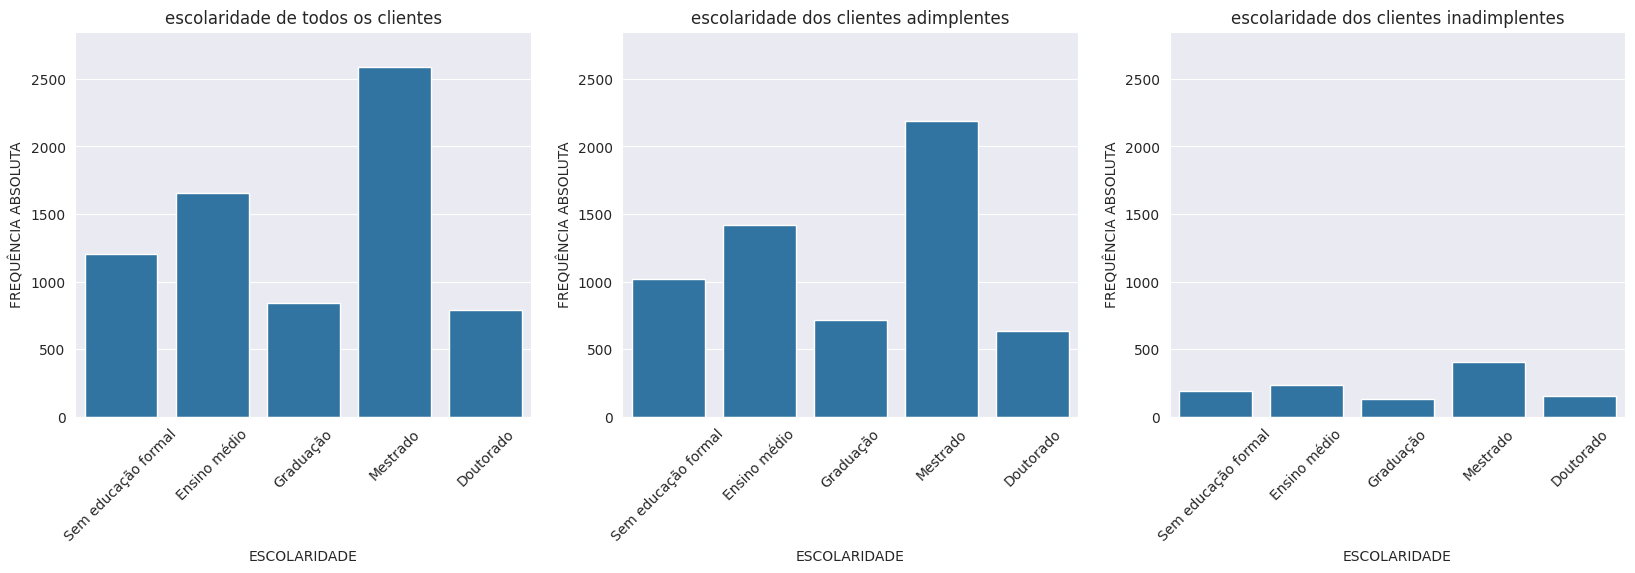

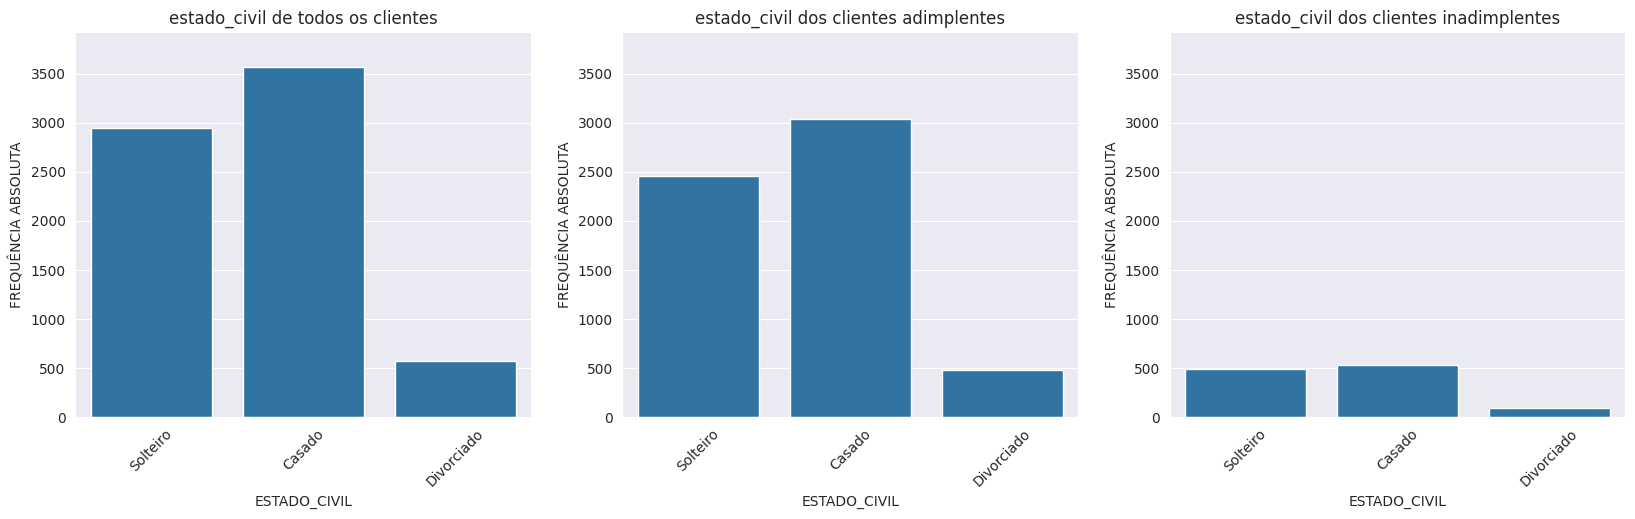

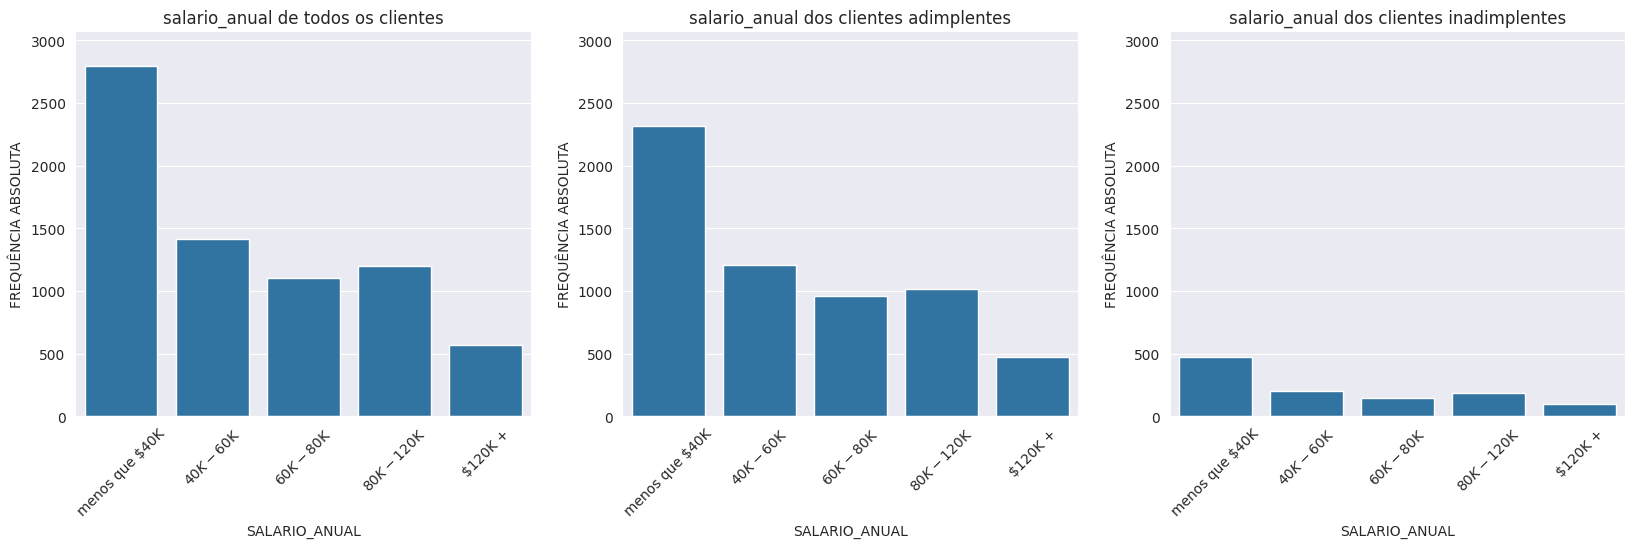

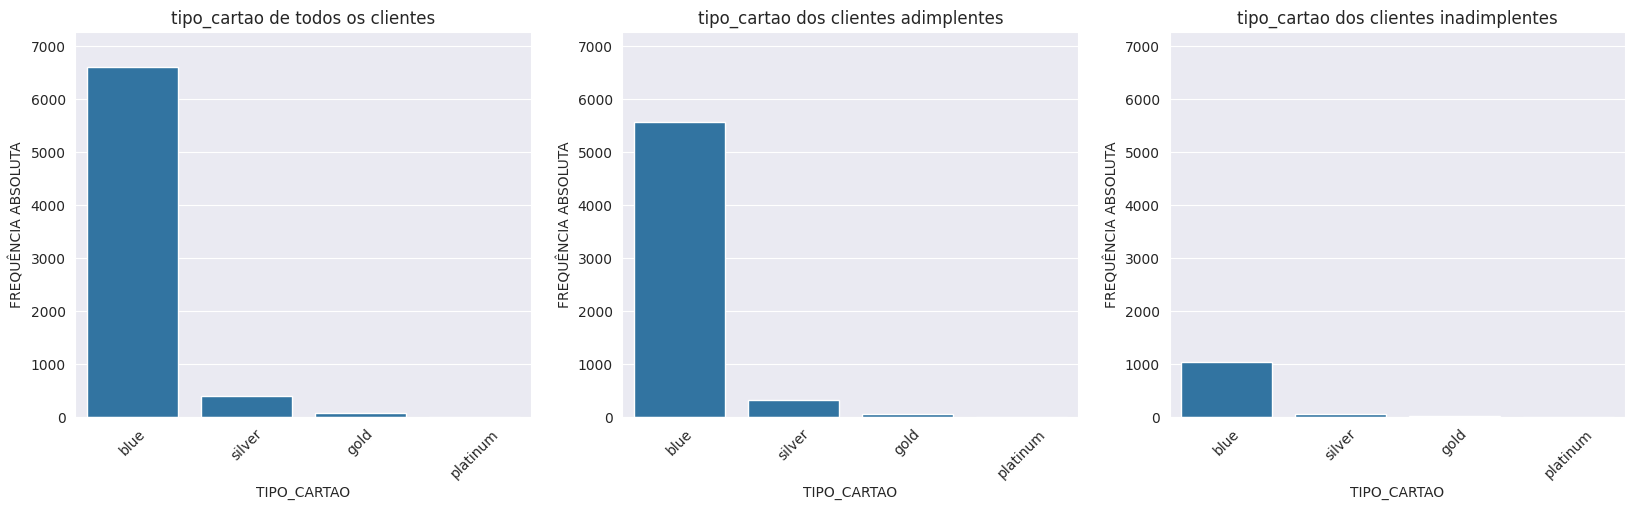

In [27]:
# Visualização:

for coluna in df.drop(labels='sexo', axis=1).select_dtypes('object'):

  titulos = [
      f'{coluna} de todos os clientes',
      f'{coluna} dos clientes adimplentes',
      f'{coluna} dos clientes inadimplentes'
      ]

  eixo = 0
  max_y = df.select_dtypes('object').describe()[coluna]['freq'] * 1.1

  figura, eixos = plt.subplots(
      nrows=1,
      ncols=3,
      figsize=(20, 5)
      )

  for dataframe in [df, df_adimplente, df_inadimplente]:

    df_to_plot = dataframe[coluna].value_counts().to_frame()
    df_to_plot.rename(
        columns={coluna: 'frequencia_absoluta'},
        inplace=True
        )  # Renomeando o nome da coluna 'escolaridade' para 'frequencia_absoluta'
    df_to_plot[coluna] = df_to_plot.index  # Criando coluna com valores == index
    # Ordenar em formato customizado pelo index:
    if coluna == 'escolaridade':
      df_to_plot = df_to_plot.reindex([
          'sem educacao formal',
          'ensino medio',
          'graduacao',
          'mestrado',
          'doutorado'
          ])
    elif coluna == 'estado_civil':
      df_to_plot = df_to_plot.reindex(['solteiro', 'casado', 'divorciado'])
    elif coluna == 'salario_anual':
      df_to_plot.reset_index(inplace=True, drop=True)
      df_to_plot = df_to_plot.reindex([0, 1, 3, 2, 4])

    f = sns.barplot(
        x=df_to_plot[coluna],
        y=df_to_plot['frequencia_absoluta'],
        ax=eixos[eixo]
        )  # Definindo os eixos x e y
    f.set(
        title=titulos[eixo],
        xlabel=coluna.upper(),
        ylabel='FREQUÊNCIA ABSOLUTA'
        )  # Definindo o título principal, do eixo x e do eixo y
    # Definindo as legendas de cada coluna:
    if coluna == 'escolaridade':
      f.set_xticklabels(
          labels=[
              'Sem educação formal',
              'Ensino médio',
              'Graduação',
              'Mestrado',
              'Doutorado'
              ],
          rotation=45
          )
    elif coluna == 'estado_civil':
      f.set_xticklabels(
          labels=['Solteiro', 'Casado', 'Divorciado'],
          rotation=45
          )
    elif (coluna == 'salario_anual') | (coluna == 'tipo_cartao'):
      f.set_xticklabels(
          labels=f.get_xticklabels(),
          rotation=45
          )

    _, max_y_f = f.get_ylim()
    max_y = max_y_f if max_y_f > max_y else max_y
    f.set(ylim=(0, max_y))

    eixo += 1

  figura.show()

### 6.1. Visualizações de dados numéricos:

In [28]:
# Atributos numéricos:

df.drop(labels='id', axis=1).select_dtypes('number').dtypes

default                      int64
idade                        int64
dependentes                  int64
meses_de_relacionamento      int64
qtd_produtos                 int64
iteracoes_12m                int64
meses_inativo_12m            int64
limite_credito             float64
valor_transacoes_12m       float64
qtd_transacoes_12m           int64
dtype: object

In [29]:
# Cinco primeiras linhas do dataframe filtrado:

df.drop(labels='id', axis=1).select_dtypes('number').head().transpose()

0        1        2        4        5
default                      0.00     0.00     0.00     0.00     0.00
idade                       45.00    49.00    51.00    40.00    44.00
dependentes                  3.00     5.00     3.00     3.00     2.00
meses_de_relacionamento     39.00    44.00    36.00    21.00    36.00
qtd_produtos                 5.00     6.00     4.00     5.00     3.00
iteracoes_12m                3.00     2.00     0.00     0.00     2.00
meses_inativo_12m            1.00     1.00     1.00     1.00     1.00
limite_credito           12691.51  8256.96  3418.56  4716.22  4010.69
valor_transacoes_12m      1144.90  1291.45  1887.72   816.08  1088.07
qtd_transacoes_12m          42.00    33.00    20.00    28.00    24.00

In [30]:
# Descrição numérica de todos os clientes:

df.drop(labels='id', axis=1).select_dtypes('number').describe().transpose()

count         mean          std      min      25%  \
default                  7081.0     0.157181     0.363997     0.00     0.00   
idade                    7081.0    46.347691     8.041225    26.00    41.00   
dependentes              7081.0     2.337805     1.291649     0.00     1.00   
meses_de_relacionamento  7081.0    35.981359     8.002609    13.00    31.00   
qtd_produtos             7081.0     3.819376     1.544444     1.00     3.00   
iteracoes_12m            7081.0     2.454456     1.104917     0.00     2.00   
meses_inativo_12m        7081.0     2.342607     0.995104     0.00     2.00   
limite_credito           7081.0  8493.259524  9126.082105  1438.00  2498.35   
valor_transacoes_12m     7081.0  4394.800669  3468.457771   510.16  2089.63   
qtd_transacoes_12m       7081.0    64.503319    23.809330    10.00    44.00   

                             50%       75%       max  
default                     0.00      0.00      1.00  
idade                      46.00     52.00     73.00  
dependentes                 2.00      3.00      5.00  
meses_de_relacionamento    36.00     40.00     56.00  
qtd_produtos                4.00      5.00      6.00  
iteracoes_12m               2.00      3.00      6.00  
meses_inativo_12m           2.00      3.00      6.00  
limite_credito           4287.22  10729.40  34516.99  
valor_transacoes_12m     3831.09   4740.51  17995.49  
qtd_transacoes_12m         67.00     80.00    134.00

In [31]:
# Descrição numérica dos clientes adimplentes:

df[df['default'] == 0].drop(labels='id', axis=1).select_dtypes('number').describe().transpose()

count         mean          std      min        25%  \
default                  5968.0     0.000000     0.000000     0.00     0.0000   
idade                    5968.0    46.317359     8.092984    26.00    41.0000   
dependentes              5968.0     2.331434     1.293032     0.00     1.0000   
meses_de_relacionamento  5968.0    35.949397     8.020490    13.00    31.0000   
qtd_produtos             5968.0     3.916555     1.515820     1.00     3.0000   
iteracoes_12m            5968.0     2.361930     1.085288     0.00     2.0000   
meses_inativo_12m        5968.0     2.276977     1.001688     0.00     2.0000   
limite_credito           5968.0  8555.587349  9116.518156  1438.01  2560.0975   
valor_transacoes_12m     5968.0  4635.007929  3587.381325   816.08  2246.8975   
qtd_transacoes_12m       5968.0    68.176441    23.318695    11.00    52.0000   

                              50%         75%       max  
default                     0.000      0.0000      0.00  
idade                      46.000     52.0000     73.00  
dependentes                 2.000      3.0000      5.00  
meses_de_relacionamento    36.000     40.0000     56.00  
qtd_produtos                4.000      5.0000      6.00  
iteracoes_12m               2.000      3.0000      5.00  
meses_inativo_12m           2.000      3.0000      6.00  
limite_credito           4349.465  10853.6175  34516.99  
valor_transacoes_12m     4048.600   4775.8550  17995.49  
qtd_transacoes_12m         70.000     82.0000    134.00

In [32]:
# Descrição numérica dos clientes inadimplentes:

df[df['default'] == 1].drop(labels='id', axis=1).select_dtypes('number').describe().transpose()

count         mean          std      min      25%  \
default                  1113.0     1.000000     0.000000     1.00     1.00   
idade                    1113.0    46.510332     7.759314    26.00    41.00   
dependentes              1113.0     2.371968     1.284245     0.00     1.00   
meses_de_relacionamento  1113.0    36.152740     7.907402    13.00    32.00   
qtd_produtos             1113.0     3.298293     1.592182     1.00     2.00   
iteracoes_12m            1113.0     2.950584     1.077184     0.00     2.00   
meses_inativo_12m        1113.0     2.694519     0.879491     0.00     2.00   
limite_credito           1113.0  8159.052462  9174.085337  1438.00  2053.06   
valor_transacoes_12m     1113.0  3106.789057  2359.711453   510.16  1867.49   
qtd_transacoes_12m       1113.0    44.807727    15.191963    10.00    37.00   

                             50%      75%       max  
default                     1.00     1.00      1.00  
idade                      46.00    52.00     68.00  
dependentes                 2.00     3.00      5.00  
meses_de_relacionamento    36.00    41.00     56.00  
qtd_produtos                3.00     5.00      6.00  
iteracoes_12m               3.00     4.00      6.00  
meses_inativo_12m           3.00     3.00      6.00  
limite_credito           4116.79  9943.21  34516.98  
valor_transacoes_12m     2309.42  2811.91  10583.79  
qtd_transacoes_12m         43.00    51.00     91.00

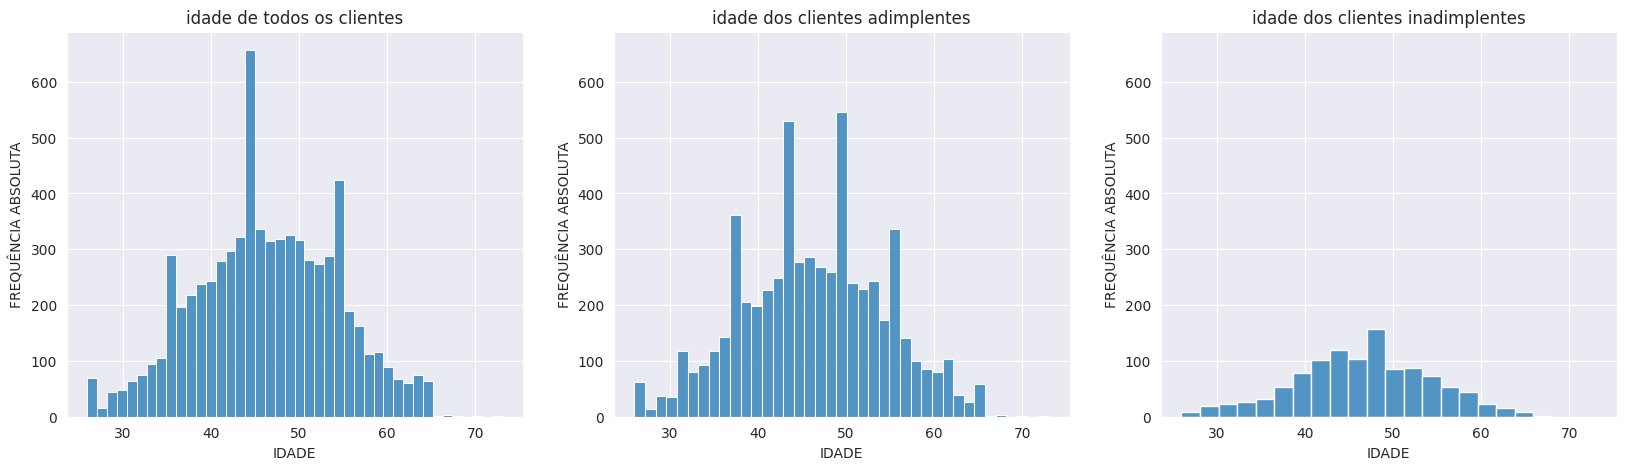

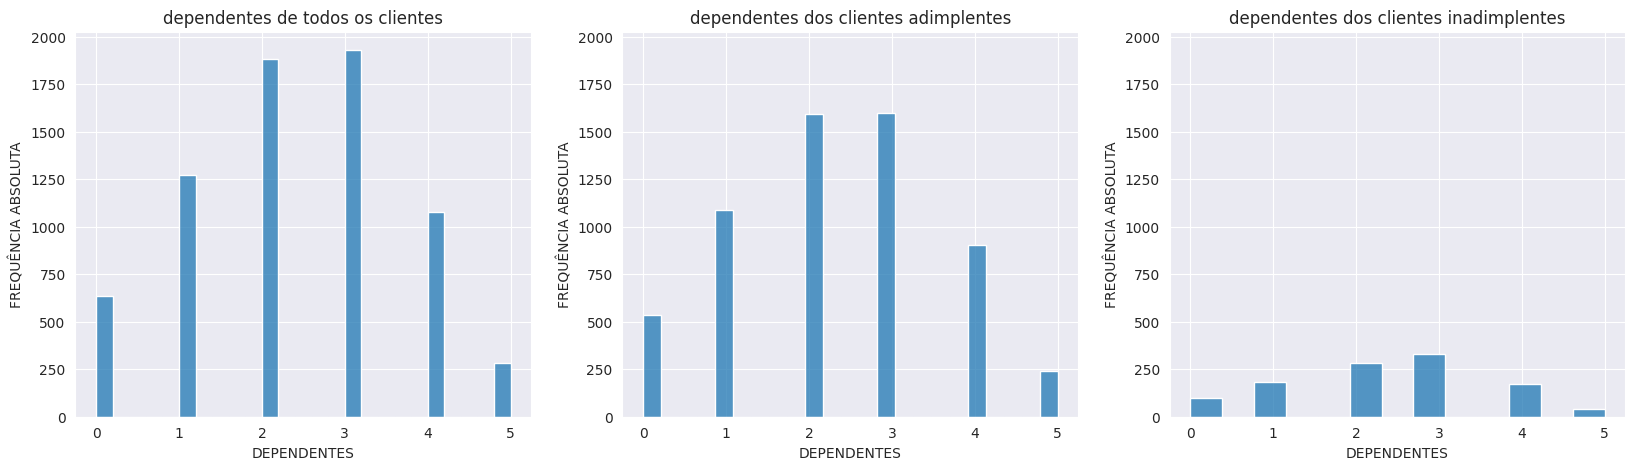

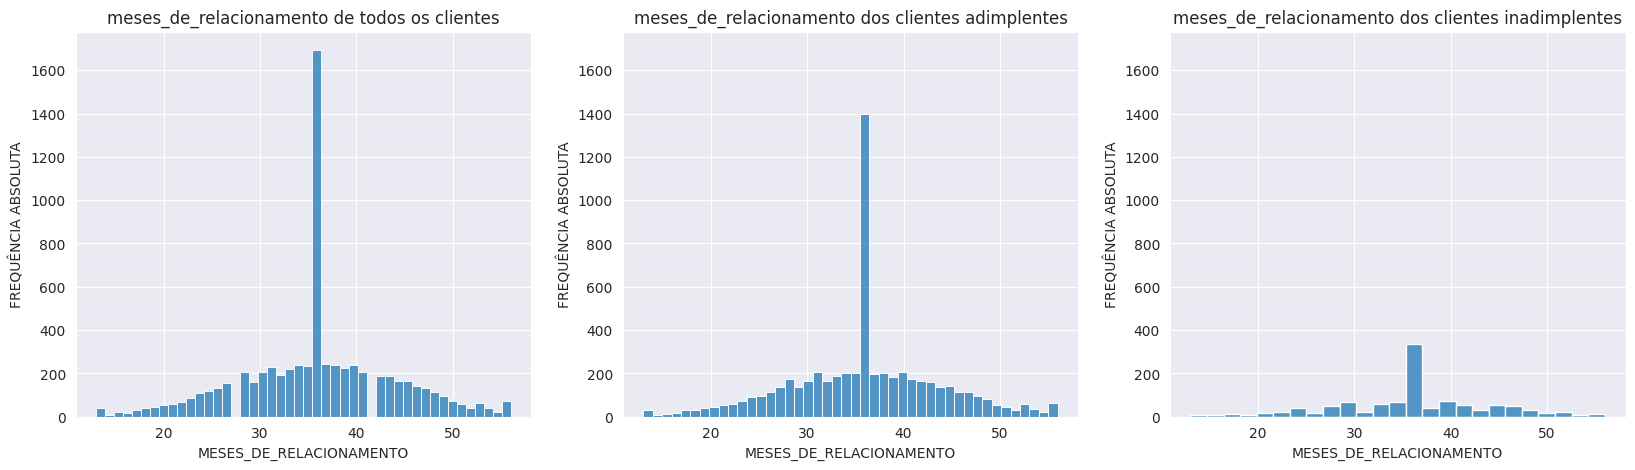

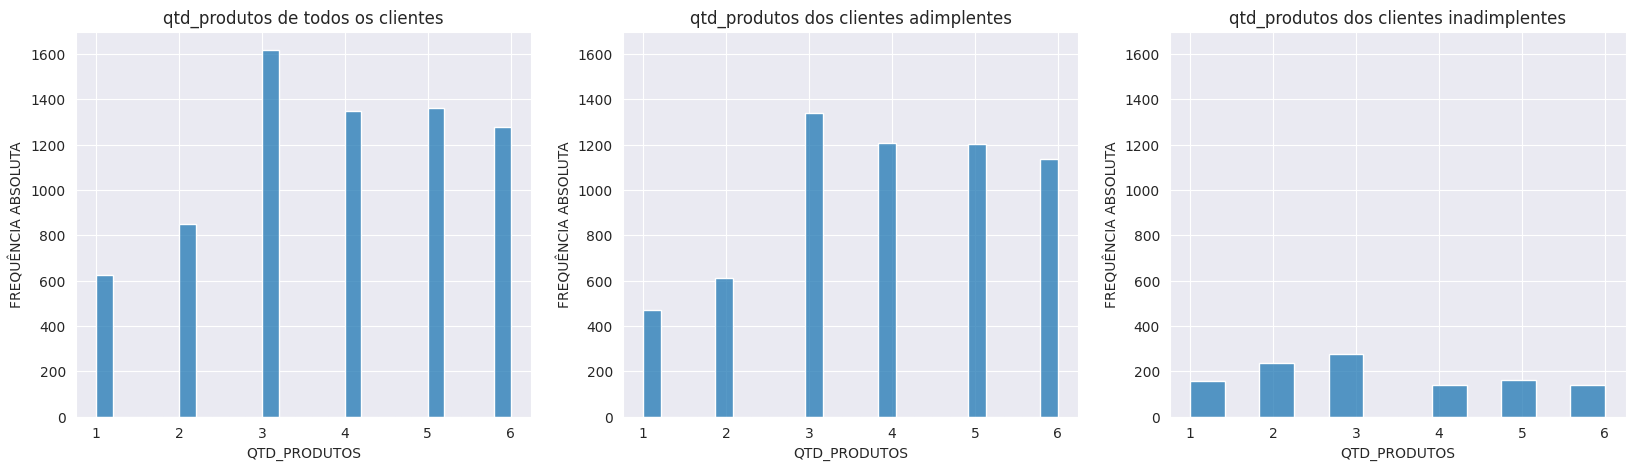

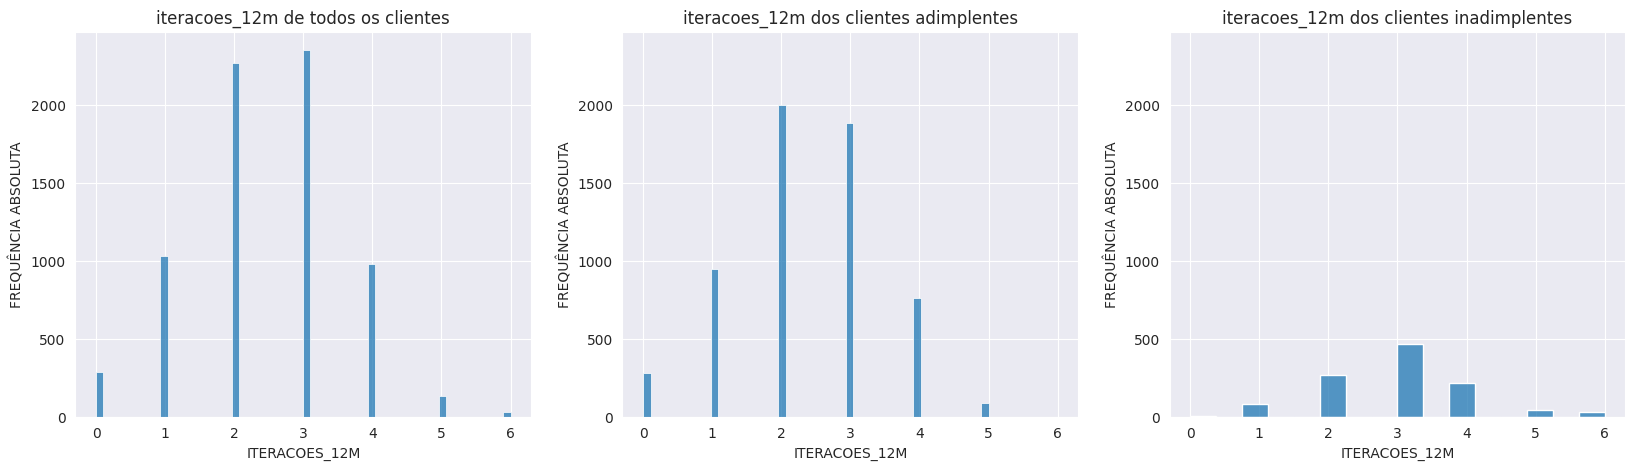

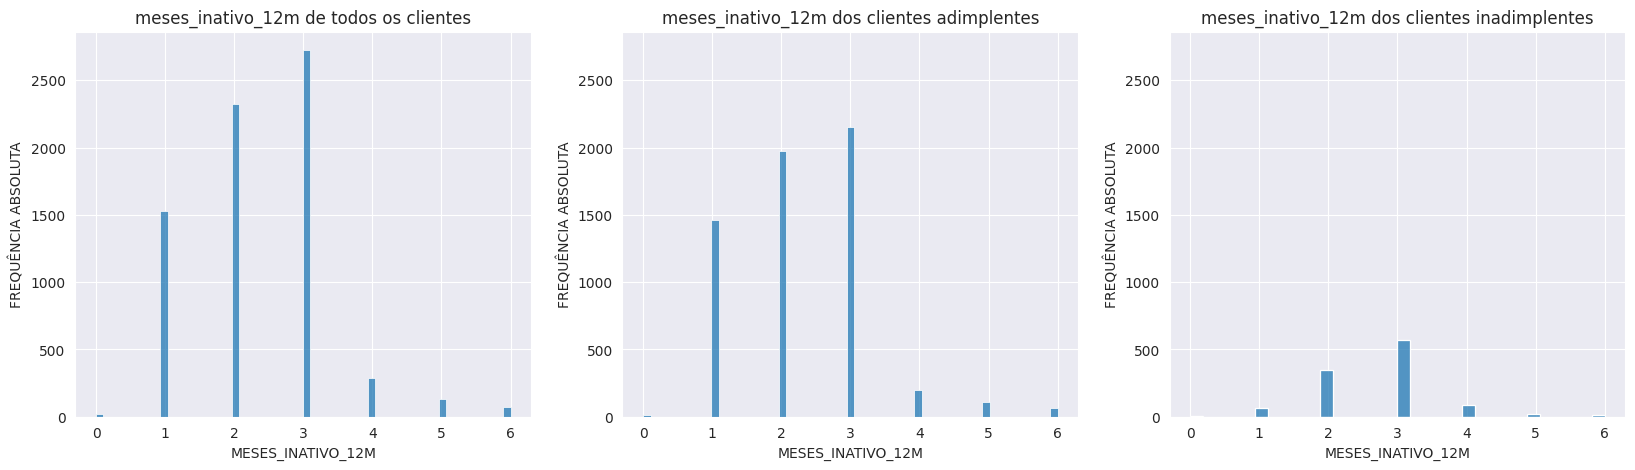

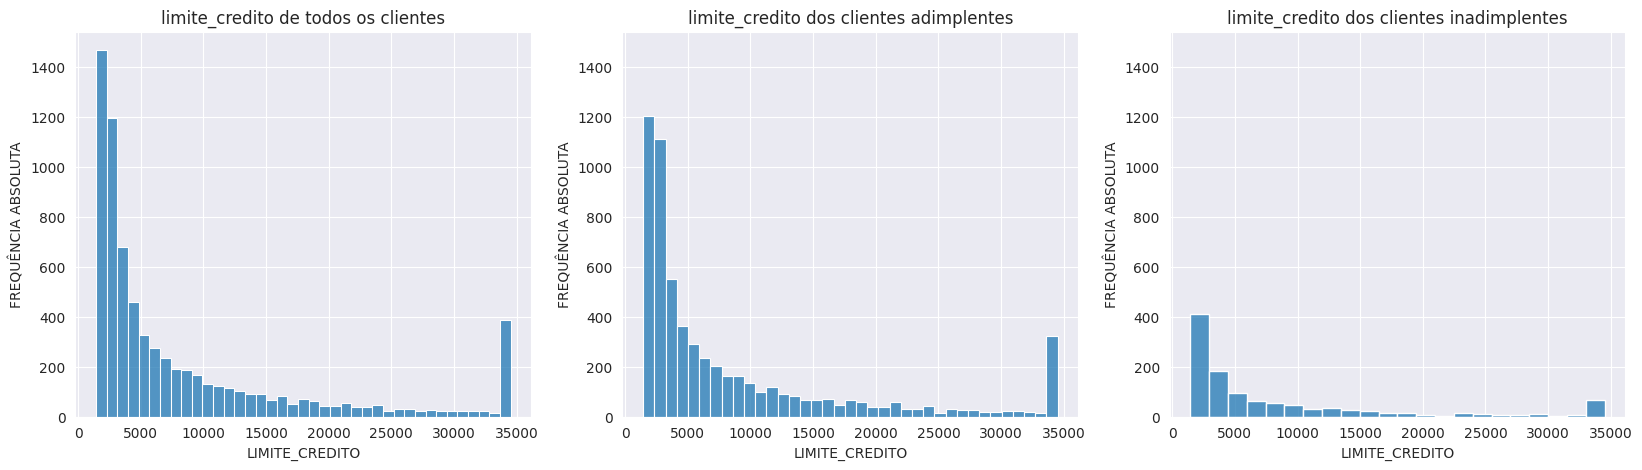

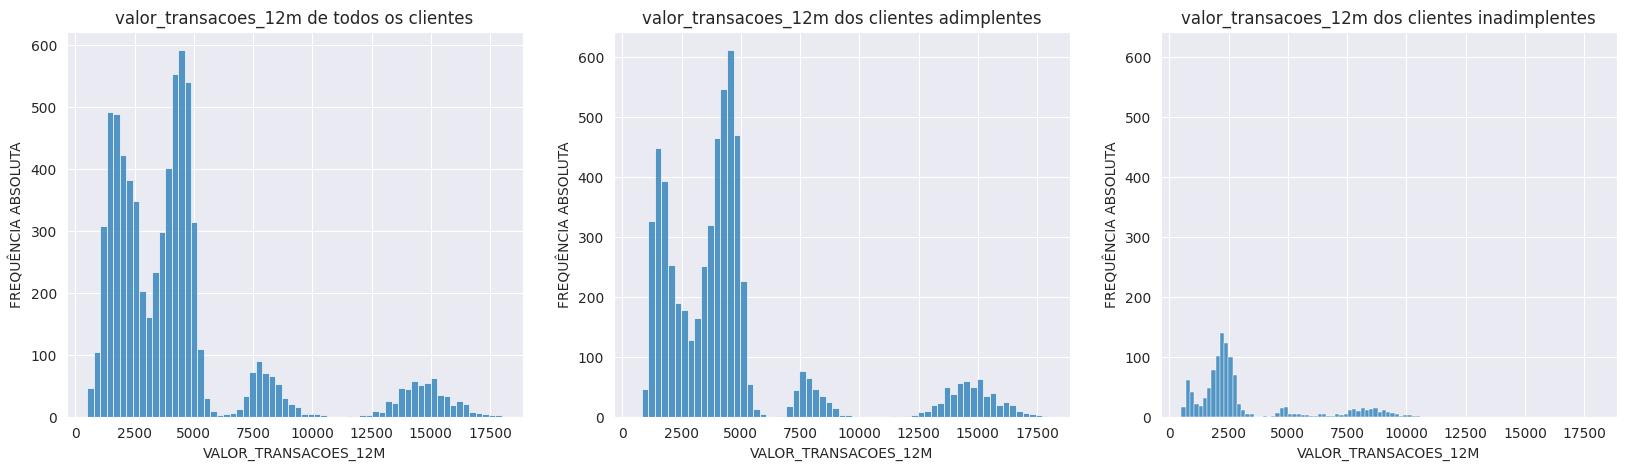

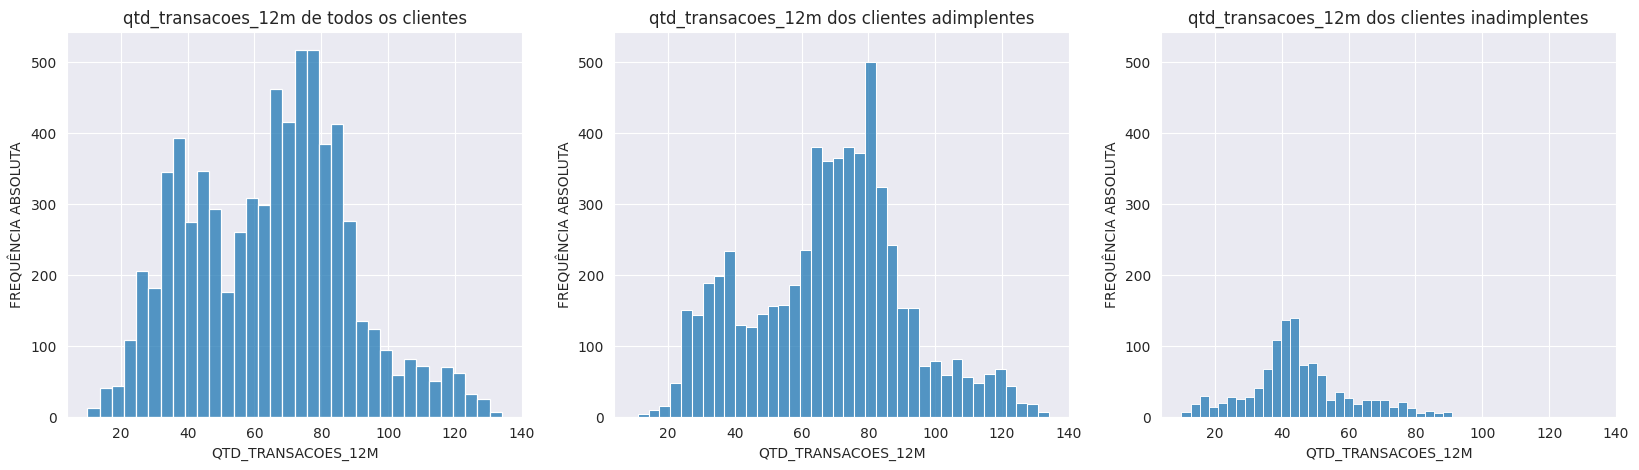

In [33]:
# Visualização:

for coluna in df.drop(labels=['id', 'default'], axis=1).select_dtypes('number'):

  titulos = [
      f'{coluna} de todos os clientes',
      f'{coluna} dos clientes adimplentes',
      f'{coluna} dos clientes inadimplentes'
      ]

  eixo = 0
  max_y = 0
  figura, eixos = plt.subplots(
      nrows=1,
      ncols=3,
      figsize=(20, 5),
      sharex=True
      )

  for dataframe in [df, df_adimplente, df_inadimplente]:

    f = sns.histplot(
        x=coluna,
        data=dataframe,
        stat='count',
        ax=eixos[eixo]
        )
    f.set(
        title=titulos[eixo],
        xlabel=coluna.upper(),
        ylabel='FREQUÊNCIA ABSOLUTA'
        )

    _, max_y_f = f.get_ylim()
    max_y = max_y_f if max_y_f > max_y else max_y
    f.set(ylim=(0, max_y))

    eixo += 1

  figura.show()

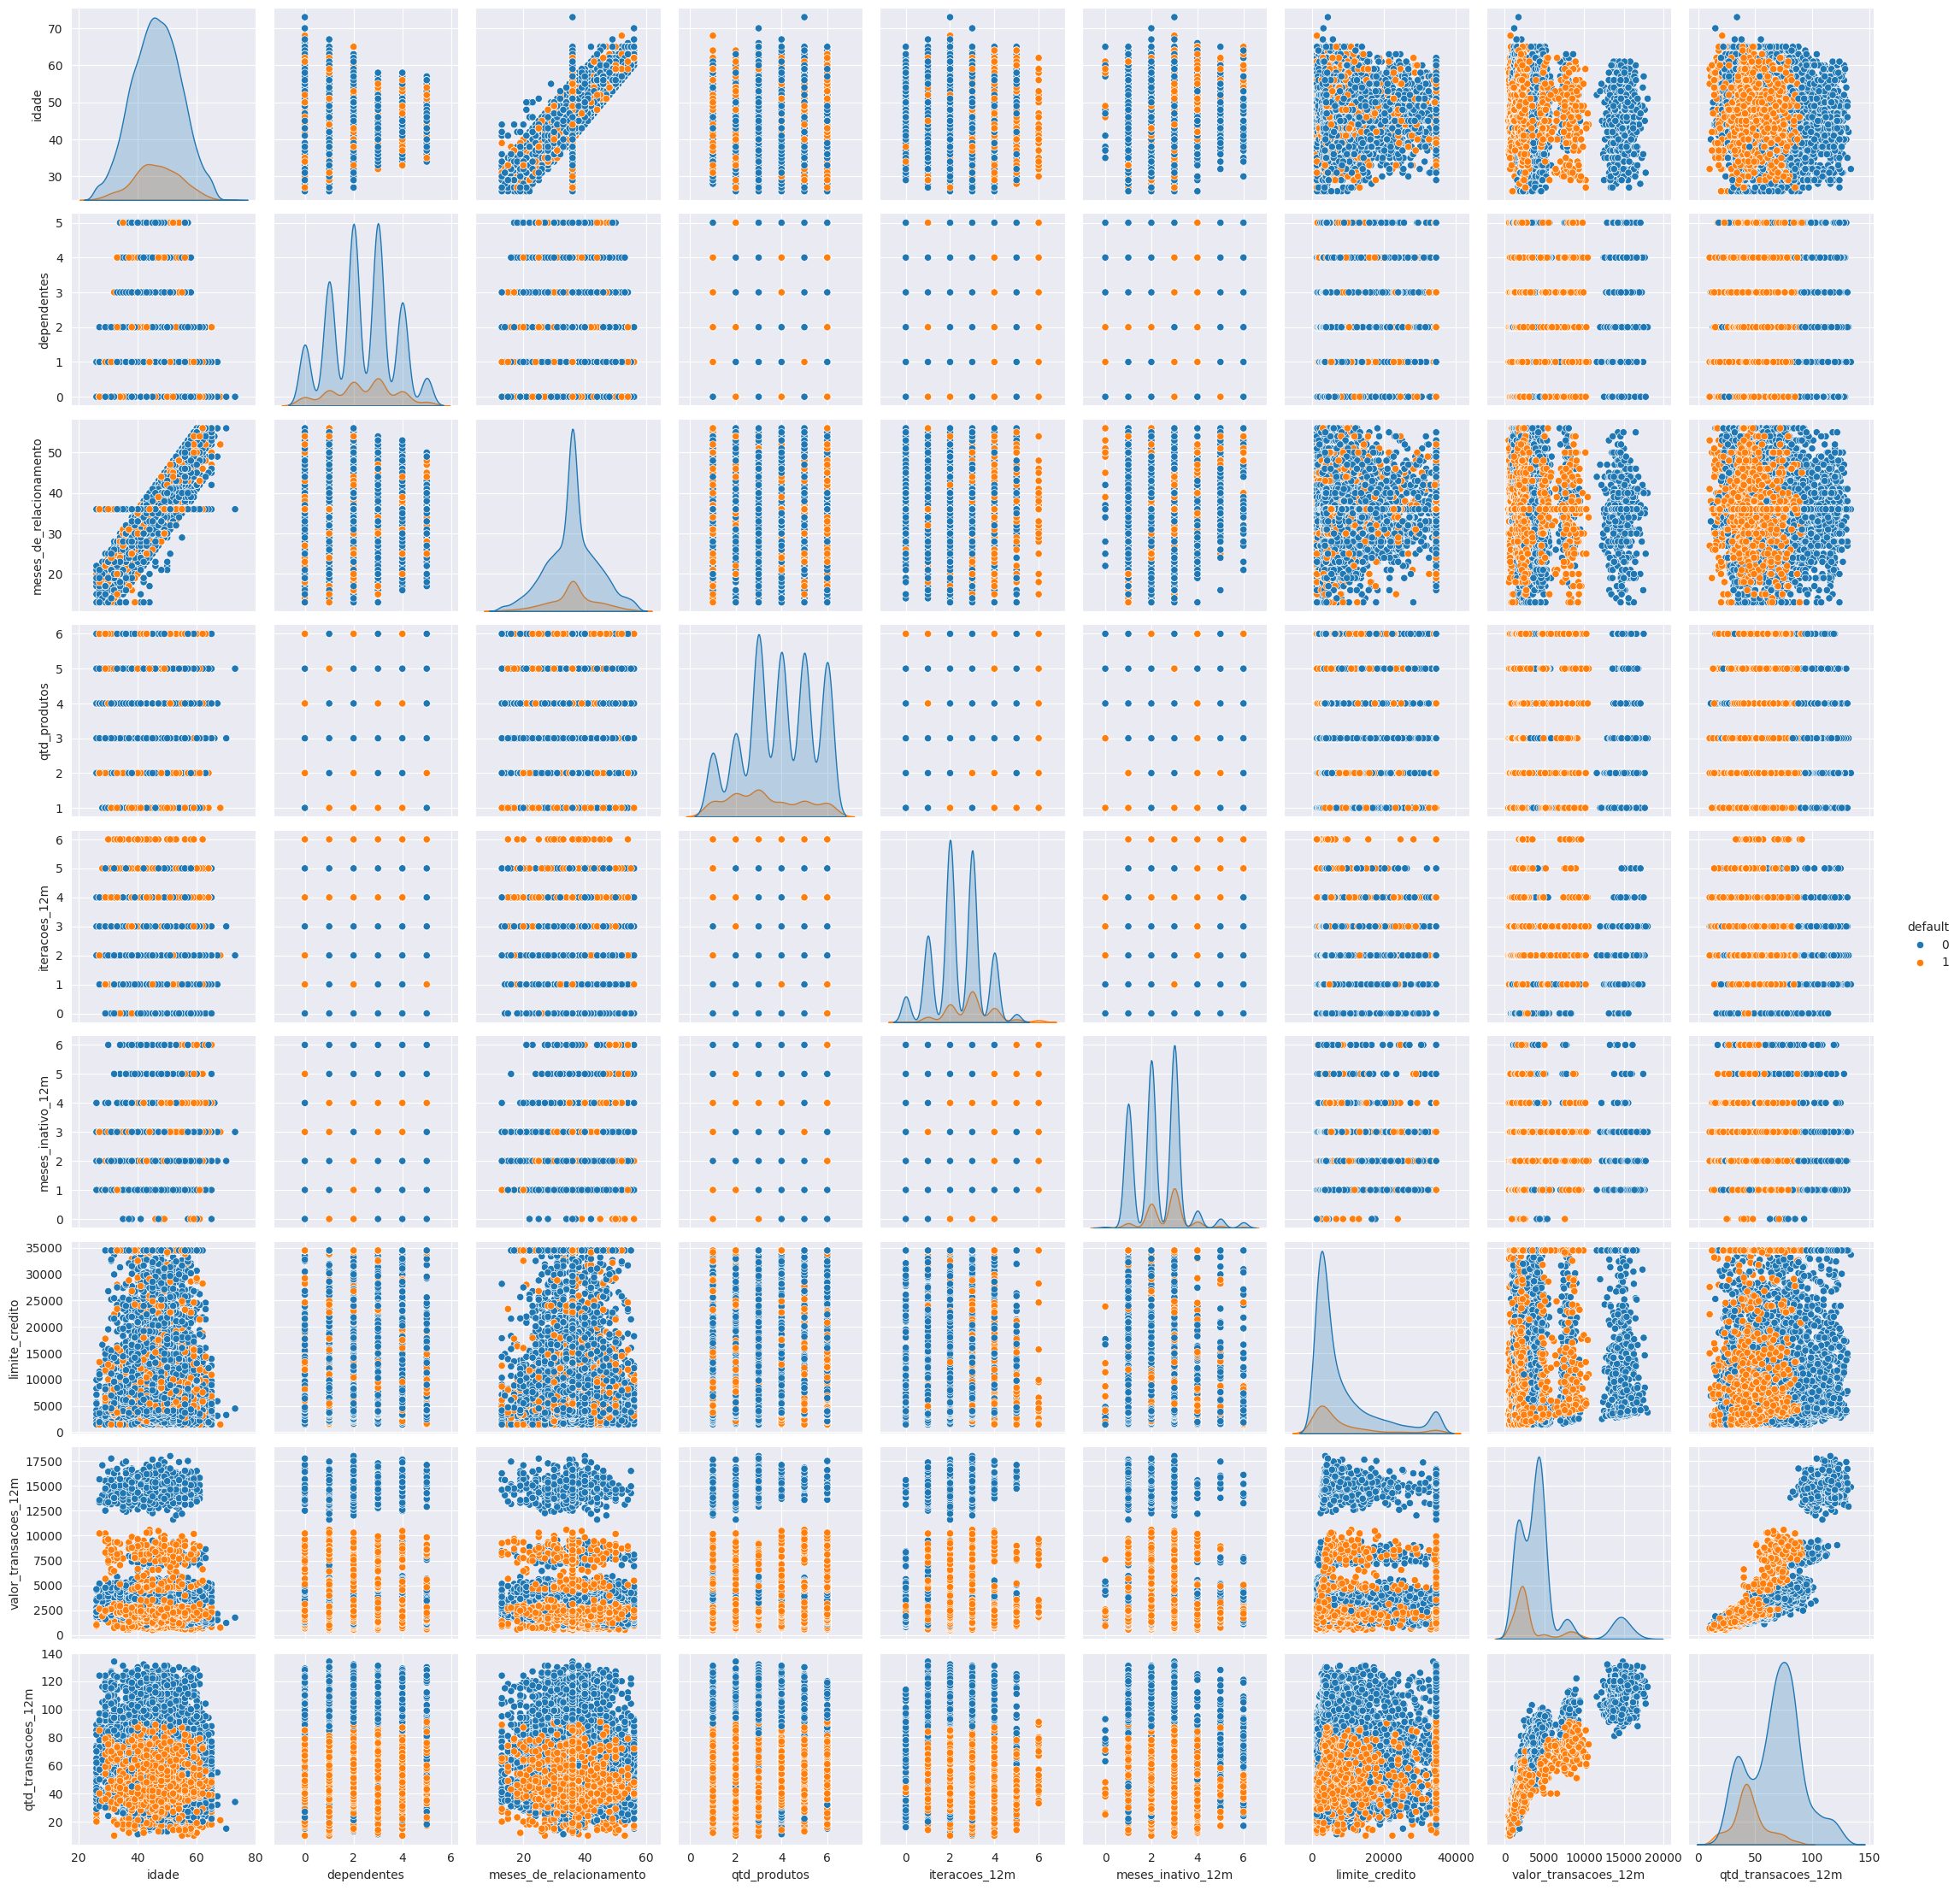

In [34]:
sns.pairplot(data=df.drop(labels='id', axis=1), hue="default")

 - Quantidade de Transações nos Últimos 12 Meses x Valor de Transações nos Últimos 12 Meses

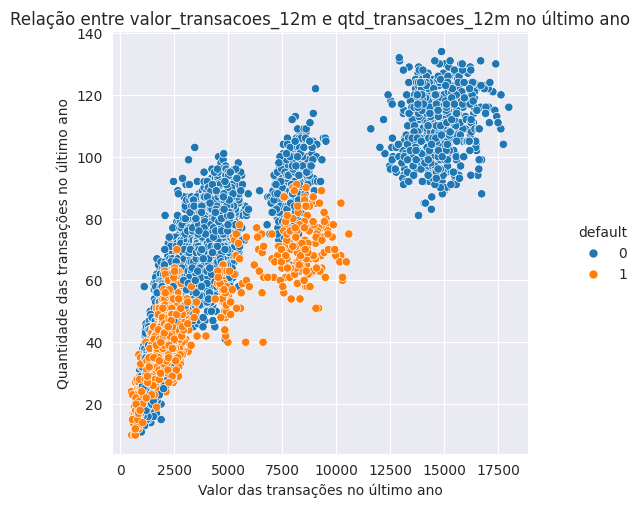

In [35]:
f = sns.relplot(
    x='valor_transacoes_12m',
    y='qtd_transacoes_12m',
    data=df,
    hue='default'
    )
_ = f.set(
    title='Relação entre valor_transacoes_12m e qtd_transacoes_12m no último ano',
    xlabel='Valor das transações no último ano',
    ylabel='Quantidade das transações no último ano'
  )

# 7\. Storytelling

Chegamos então a algumas conclusões que podem elucidar a inadimplência de pagamentos dos clientes de acordo com os atributos disponibilizados para relacionarmos com a variável resposta.

Alguns destes atributos foram desconsiderados para os resultados da análise, como é o caso da coluna `id` que descreve a conta bancária e serve como chave primária para identificação única do cliente, porém não interfere em nenhum resultado de comparação, assim como a coluna `sexo`, que por se tratar de um tipo de dado sensível protegido pela [LGPD](https://www.gov.br/cidadania/pt-br/acesso-a-informacao/lgpd/classificacao-dos-dados) também não deve ser levada em consideração.

Exploramos todas as variáveis explicativas tanto de forma independente como correlacionadas umas com as outras, tendo como principal referência de comparação a variável resposta da coluna `default` que se trata do atributo de interesse e descreve a adimplência ou inadimplência dos clientes.

Abaixo veremos algumas considerações resultantes das análises dos tipos categóricos e numéricos.

### 7.1. Resultados dos atributos **categóricos:**

- *`sexo`*: Atributo desconsiderado;

- `escolaridade`: Proporção semelhante entre clientes adimplentes e inadimplentes em relação ao total;

- `estado_civil`: Clientes inadimplentes em maior número quando relação conjugal determina solteiros;

- `salario_anual`: Proporção semelhante entre clientes adimplentes e inadimplentes em relação ao total;

- `tipo_cartao`: Proporção semelhante entre clientes adimplentes e inadimplentes em relação ao total;

### 7.2. Resultados dos atributos **numéricos:**

> - *`id`*: *Atributo desconsiderado*;

> - ***`default`***: **Variável dependente**;

- `idade`: Irrelevante nos resultados;

- `dependentes`: Irrelevante nos resultados;

- `meses_de_relacionamento`: Irrelevante nos resultados;

- `qtd_produtos`: De 6(seis) produtos que clientes podem ter contratado, quem possui até 3(três) apresenta a taxa de inadimplência mais elevada do que quem possui mais;

- `iteracoes_12m`: Clientes inadimplentes chegaram a ter 6(seis) iterações anuais com o banco enquanto os clientes adimplentes tiveram apenas 5(cinco) iterações;

- `meses_inativo_12m`: Irrelevante nos resultados;

- `limite_credito`: Irrelevante nos resultados;

- `valor_transacoes_12m`: Clientes inadimplentes efetuaram transações com valores de até R$ 10.583 enquanto clientes adimplentes os valores chegaram até 17.995;

- `qtd_transacoes_12m`: Clientes que se mostram adimplentes efetuaram até 134 transações (média de 68 transações) com boa parte dos valores na faixa de 15.000 BRL;

- Em contrapartida clientes que se mostraram inadimplentes efetuaram no máximo 91 transações (média de 44 transações) com valores menores concentrados na faixa de R$ 2.500 BRL.

- **A taxa de INADIMPLÊNCIA    (default=1) também se torna presente, e constantemente elevada entre clientes que efetuaram uma (média de apenas 40 transações) no último ano.**

____